# Build models programmatically using R API

## The SAS R SWAT package enables you to connect to SAS Cloud Analytic Services (CAS) engine that is the centerpiece of the SAS Viya framework. 

## In order to access this functionality, the SAS SWAT package must first be downloaded and installed from https://github.com/sassoftware/R-swat

In [1]:
# Import packages
library('swat')
library('ggplot2')
library('repr')

NOTE: The extension module for binary protocol support is not available.
      Only the CAS REST interface can be used.
SWAT 1.0.0


In [2]:
# Start a CAS session
# This uses REST (protocol=http)
sess <- swat::CAS('<your CAS server here>', <your CAS server port here>, protocol='http', caslib="public")

NOTE: Connecting to CAS and generating CAS action functions for loaded
      action sets...
NOTE: To generate the functions with signatures (for tab completion), set 
      options(cas.gen.function.sig=TRUE).


In [3]:
# Set helper variables
gcaslib <- "public"
prepped_data <- "bank_prepped"
target <- c("b_tgt")
class_inputs <- c("cat_input1", "cat_input2", "demog_ho", "demog_genf", "demog_genm")
interval_inputs <- c("im_demog_age", "im_demog_homeval", "im_demog_inc", "demog_pr", "log_rfm1", "rfm2", "log_im_rfm3", "rfm4", "rfm5", "rfm6", "rfm7", "rfm8", "rfm9", "rfm10", "rfm11", "rfm12")
class_vars <- c(target, class_inputs)

## Train and score Stepwise Regression model using the data prepared in SAS Studio

In [4]:
# Load action set
loadActionSet(sess, "regression")

# Train Logistic Regression
cas.regression.logistic(
    sess, 
    table=list(name=prepped_data, caslib=gcaslib), 
    class=list(vars=class_vars), 
    model=list(depVars=list(list(name="b_tgt", options=list(event="1"))), effects=list(list(vars=c(class_inputs, interval_inputs)))),
    partByVar=list(name="_partind_", train="1", valid="0"),
    selection=list(method="STEPWISE"),
    output=list(casOut=list(name="_scored_logistic", replace=TRUE), copyVars=list("account", "b_tgt", "_partind_"))
)

# Compute p_b_tgt0 and p_b_tgt1 for assessment
cas.dataStep.runCode(
    sess,
    code="data _scored_logistic; set _scored_logistic; p_b_tgt0=1-_pred_; rename _pred_=p_b_tgt1; run;"
)

NOTE: Added action set 'regression'.
NOTE: Information for action set 'regression':
NOTE:    regression
NOTE:       glm - Fits linear regression models using the method of least squares
NOTE:       genmod - Fits generalized linear regression models
NOTE:       logistic - Fits logistic regression models
NOTE: Convergence criterion (GCONV=1E-8) satisfied.


Class,Levels,Values
cat_input1,3,X Y Z
cat_input2,5,A B C D E
demog_ho,2,0 1
demog_genf,2,0 1
demog_genm,2,0 1
RowId,Description,Value
DATA,Data Source,BANK_PREPPED
RESPONSEVAR,Response Variable,b_tgt
DIST,Distribution,Binary
LINK,Link Function,Logit


NOTE: Missing values were generated as a result of performing an operation on missing values.
      Each place is given by: (Number of times) at (Line):(Column).
      178 at 0:55
      85 at 0:55
      90 at 0:55
      154 at 0:55
      121 at 0:55
      109 at 0:55
      110 at 0:55
      255 at 0:55
      658 at 0:55
      727 at 0:55
      422 at 0:55
      707 at 0:55
      680 at 0:55
      678 at 0:55
      732 at 0:55
      745 at 0:55
NOTE: Duplicate messages output by DATA step:
NOTE: Missing values were generated as a result of performing an operation on missing values.  (occurred 16 times)
      Each place is given by: (Number of times) at (Line):(Column).  (occurred 16 times)


casLib,Name,Rows,Columns
CASUSER(ramyne),_scored_logistic,485452,4
casLib,Name,Rows,Columns
CASUSER(ramyne),_scored_logistic,485452,5


## Load the GBM model create in SAS Visual Analytics and score using this model

In [5]:
# 1. Load GBM model (ASTORE) created in VA
cas.table.loadTable(
    sess,
    caslib="models",
    path="Gradient_Boosting_VA.sashdat",
    casout=list(name="gbm_astore_model", caslib="casuser", replace=TRUE)
)

# 2. Score code from VA (for data preparation)
cas.dataStep.runCode(
  sess,
  code="data bank_part_post; 
            set bank_part(caslib='public'); 
            _va_calculated_54_1=round('b_tgt'n,1.0);
            _va_calculated_54_2=round('demog_genf'n,1.0);
            _va_calculated_54_3=round('demog_ho'n,1.0);
            _va_calculated_54_4=round('_PartInd_'n,1.0);
        run;"
)

# 3. Score using ASTORE
loadActionSet(sess, "astore")

cas.astore.score(
    sess,
    table=list(name="bank_part_post"),
    rstore=list(name="gbm_astore_model"),
    out=list(name="_scored_gbm", replace=TRUE),
    copyVars=list("account", "_partind_", "b_tgt")
)

# 4. Rename p_b_tgt0 and p_b_tgt1 for assessment
cas.dataStep.runCode(
    sess,
    code="data _scored_gbm; 
            set _scored_gbm; 
            rename p__va_calculated_54_10=p_b_tgt0
                   p__va_calculated_54_11=p_b_tgt1;
          run;"
)

NOTE: Cloud Analytic Services made the file Gradient_Boosting_VA.sashdat available as table GBM_ASTORE_MODEL in caslib CASUSER(ramyne).


$caslib
[1] "CASUSER(ramyne)"

$tableName
[1] "GBM_ASTORE_MODEL"

casLib,Name,Rows,Columns
Public,bank_part,485452,26
casLib,Name,Rows,Columns
CASUSER(ramyne),bank_part_post,485452,30


NOTE: Added action set 'astore'.
NOTE: Information for action set 'astore':
NOTE:    astore
NOTE:       describe - Describes some of the contents of the analytic store
NOTE:       score - Uses an analytic store to score a CAS input table


Task,Seconds,Percent
Loading the Store,1.096725e-05,4.724736e-06
Creating the State,9.996295e-02,4.306443e-02
Scoring,2.221260e+00,9.569275e-01
Total,2.321242e+00,1.000000e+00


casLib,Name,Rows,Columns
CASUSER(ramyne),_scored_gbm,485452,7
casLib,Name,Rows,Columns
CASUSER(ramyne),_scored_gbm,485452,7


## Load the Forest model created in SAS Studio and score using this model

In [6]:
# Load action set
loadActionSet(sess, "decisionTree")

# Score using forest_model table
cas.decisionTree.forestScore(
    sess,
    table=list(name=prepped_data, caslib=gcaslib),
    modelTable=list(name="forest_model", caslib="public"),
    casOut=list(name="_scored_rf", replace=TRUE),
    copyVars=list("account", "b_tgt", "_partind_"),
    vote="PROB"
)

# Create p_b_tgt0 and p_b_tgt1 as _rf_predp_ is the probability of event in _rf_predname_
cas.dataStep.runCode(
    sess,
    code="data _scored_rf; 
            set _scored_rf; 
            if _rf_predname_=1 then do; 
              p_b_tgt1=_rf_predp_; 
              p_b_tgt0=1-p_b_tgt1; 
            end; 
            if _rf_predname_=0 then do; 
              p_b_tgt0=_rf_predp_; 
              p_b_tgt1=1-p_b_tgt0; 
            end; 
          run;"
)

NOTE: Added action set 'decisionTree'.
NOTE: Information for action set 'decisionTree':
NOTE:    decisionTree
NOTE:       dtreeTrain - Train a decision tree
NOTE:       dtreeScore - Score a table using a decision tree model
NOTE:       dtreeSplit - Split decision tree nodes
NOTE:       dtreePrune - Prune a decision tree
NOTE:       dtreeMerge - Merge decision tree nodes
NOTE:       dtreeCode - Generate DATA step scoring code from a decision tree model
NOTE:       forestTrain - Train a forest
NOTE:       forestScore - Score a table using a forest model
NOTE:       forestCode - Generate DATA step scoring code from a forest model
NOTE:       gbtreeTrain - Train a gradient boosting tree
NOTE:       gbtreeScore - Score a table using a gradient boosting tree model
NOTE:       gbtreecode - Generate DATA step scoring code from a gradient boosting tree model


$OutputCasTables
           casLib       Name   Rows Columns
1 CASUSER(ramyne) _scored_rf 485452       8

$ScoreInfo
                        Descr                            Value
1 Number of Observations Read                           485452
2 Number of Observations Used                           485452
3 Misclassification Error (%)                     7.4378105353

NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).
      0:61    0:192
NOTE: Duplicate messages output by DATA step:
NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).  (occurred 16 times)
      0:61    0:192  (occurred 16 times)


casLib,Name,Rows,Columns
CASUSER(ramyne),_scored_rf,485452,8
casLib,Name,Rows,Columns
CASUSER(ramyne),_scored_rf,485452,10


## Load the SVM model created in SAS Studio and score using this model

In [7]:
# Score using ASTORE
loadActionSet(sess, "astore")

cas.astore.score(
    sess,
    table=list(name=prepped_data, caslib=gcaslib),
    rstore=list(name="svm_astore_model", caslib="public"),
    out=list(name="_scored_svm", replace=TRUE),
    copyVars=list("account", "_partind_", "b_tgt")
)

NOTE: Added action set 'astore'.
NOTE: Information for action set 'astore':
NOTE:    astore
NOTE:       describe - Describes some of the contents of the analytic store
NOTE:       score - Uses an analytic store to score a CAS input table


Task,Seconds,Percent
Loading the Store,7.867813e-06,8.225189e-06
Creating the State,4.049063e-03,4.232981e-03
Scoring,9.524889e-01,9.957533e-01
Total,9.565511e-01,1.000000e+00


## Assess models from SAS Visual Analytics, SAS Studio and the new models created in R interface

In [8]:
# Assess models
assess.model <- function(prefix) {
    cas.percentile.assess(
        sess,
        table=list(name=paste0('_scored_', prefix), where='_partind_=0'),
        inputs="p_b_tgt1",
        response="b_tgt",
        event="1",
        pVar=list("p_b_tgt0"),
        pEvent=list("0")
    )
}

lrAssess    <- assess.model("logistic")
lr_fitstat  <- lrAssess$FitStat
lr_rocinfo  <- lrAssess$ROCInfo
lr_liftinfo <- lrAssess$LIFTInfo

rfAssess    <- assess.model("rf")    
rf_fitstat  <- rfAssess$FitStat
rf_rocinfo  <- rfAssess$ROCInfo
rf_liftinfo <- rfAssess$LIFTInfo

gbmAssess   <- assess.model("gbm")    
gbm_fitstat <- gbmAssess$FitStat
gbm_rocinfo <- gbmAssess$ROCInfo
gbm_liftinfo<- gbmAssess$LIFTInfo

svmAssess   <- assess.model("svm")    
svm_fitstat <- svmAssess$FitStat
svm_rocinfo <- svmAssess$ROCInfo
svm_liftinfo<- svmAssess$LIFTInfo

In [9]:
# Add new variable to indicate type of model
lr_liftinfo$model  <- "Logistic (R API)"
lr_rocinfo$model   <- 'Logistic (R API)'
rf_liftinfo$model  <- "Autotuned Forest (SAS Studio)"
rf_rocinfo$model   <- "Autotuned Forest (SAS Studio)"
gbm_liftinfo$model <- "Gradient Boosting (SAS VA)"
gbm_rocinfo$model  <- "Gradient Boosting (SAS VA)"
svm_liftinfo$model <- "SVM (SAS Studio)"
svm_rocinfo$model  <- "SVM (SAS Studio)"

# Append data
all_liftinfo <- rbind(lr_liftinfo, rbind(rf_liftinfo, rbind(gbm_liftinfo, svm_liftinfo)))
all_rocinfo  <- rbind(lr_rocinfo, rbind(rf_rocinfo, rbind(gbm_rocinfo, svm_rocinfo))) 

In [10]:
print("----- AUC (using validation data) -----")
all_rocinfo2 <- unique(all_rocinfo[, c("model", "C")])
all_rocinfo2[with(all_rocinfo2, order(-C)), ]

[1] "----- AUC (using validation data) -----"


,model,C
114,Autotuned Forest (SAS Studio),0.9479502
110,SVM (SAS Studio),0.8716945
1,Logistic (R API),0.8600698
112,Gradient Boosting (SAS VA),0.8556928


## Draw Assessment Plots

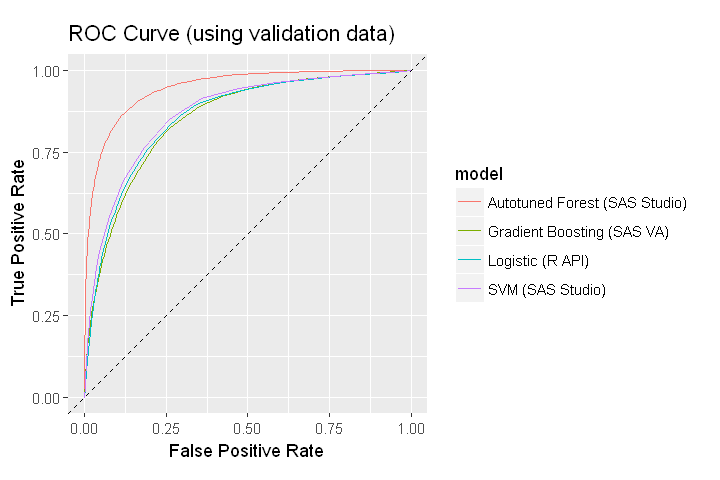

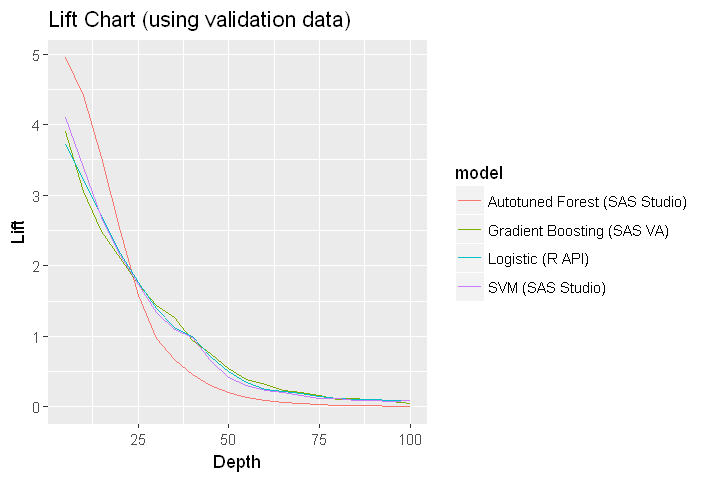

In [11]:
# Set plot mimetype to PNG so it renders in all browsers
options(jupyter.plot_mimetypes = "image/png") 
# Set plot size
options(repr.plot.width = 6, repr.plot.height = 4)

# Draw ROC charts 
ggplot(all_rocinfo[c('FPR', 'Sensitivity', 'model')], 
       aes(x = as.numeric(FPR), y = as.numeric(Sensitivity), color = model)) + 
       geom_line() + geom_abline(linetype='dashed') + coord_fixed() + 
       labs(title = 'ROC Curve (using validation data)', x = 'False Positive Rate', y = 'True Positive Rate')

# Draw lift charts 
ggplot(all_liftinfo[c('Depth', 'Lift', 'model')], 
       aes(x = as.numeric(Depth), y = as.numeric(Lift), color = model)) + 
       geom_line() +
       labs(title = 'Lift Chart (using validation data)', x = 'Depth', y = 'Lift')